In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt

In [3]:
#拉格朗日插值法
#拉格朗日插值多项式类
class LagrangeInterPolynomial:
    def __init__(self,point_x_list,point_y_list):
        assert len(point_x_list) == len(point_y_list)
        self.x_list = point_x_list
        self.y_list = point_y_list
        self.base_function_down_values = [""] * len(self.x_list)
    
    def base_function(self,input_x,k):
        up_value = 1
        down_value = 1
        if self.base_function_down_values[k] != "":
            down_value = self.base_function_down_values[k]
            for i in range(len(self.x_list)):
                if i != k:
                    up_value *= input_x - self.x_list[i]    
            return up_value / down_value 

        for i in range(len(self.x_list)):
            if i != k:
                up_value *= input_x - self.x_list[i]
                down_value *= self.x_list[k] - self.x_list[i]
        self.base_function_down_values[k] = down_value    
        return up_value / down_value

    def get_value(self,input_x):
        result = 0
        for i in range(len(self.x_list)):
            result += self.y_list[i] * self.base_function(input_x,i)
        return result

    def get_list_value(self,input_x_array):
        output_y_array = np.array([])
        for x in input_x_array:
            y = self.get_value(x)
            output_y_array =  np.insert(output_y_array,output_y_array.shape[0],y)
        return output_y_array

Index(['RMBS', 'Unnamed: 1', 'Unnamed: 2', '车贷ABS', 'Unnamed: 4', 'Unnamed: 5',
       '消金', 'Unnamed: 7', 'Unnamed: 8', '地产', 'Unnamed: 10', 'Unnamed: 11',
       '建筑', 'Unnamed: 13'],
      dtype='object')


C:\Users\10266\Anaconda3\envs\geo36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\10266\Anaconda3\envs\geo36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\10266\Anaconda3\envs\geo36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\10266\Anaconda3\envs\geo36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\10266\Anaconda3\envs\geo36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\10266\Anaconda3\envs\geo36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


AssertionError: 

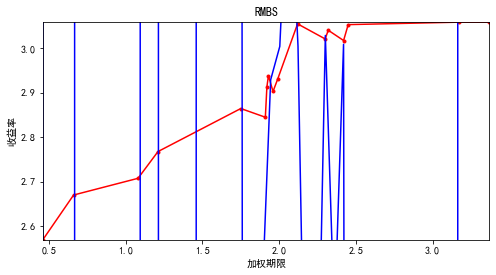

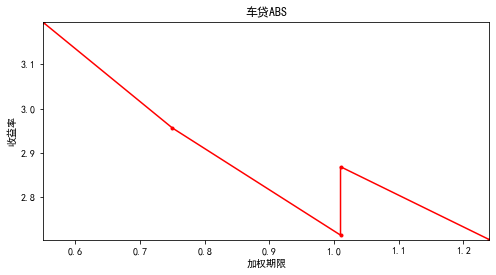

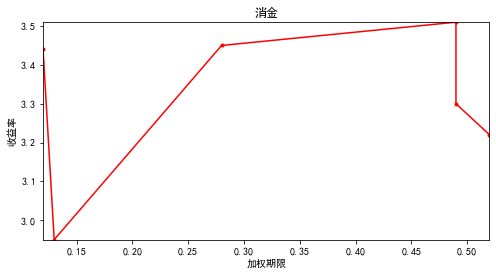

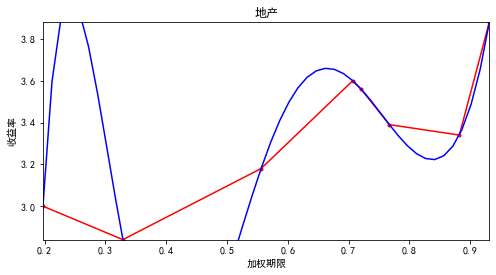

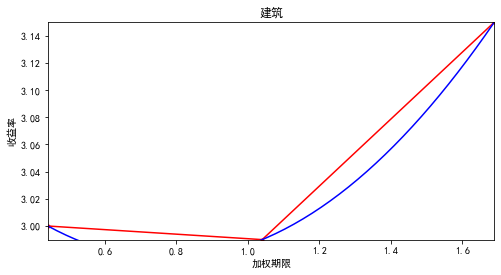

In [15]:
def sort_numpy_rows_by_one_column(array,col_index):
    length = array.shape[0]
    for i in range(array.shape[0]):
        if array[i][0] == "":
            length = i
            break
    array = array[:length,:]

    sort_indices = array[:,col_index].argsort()
    return array[sort_indices]
def remove_repeat_rows_by_element_in_first_col(matrix):

def single_plot(title,x_array,y_array):
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title)
    ax.set_xlabel('加权期限')
    ax.set_ylabel('收益率')
    cur_cz = LagrangeInterPolynomial(x_array.tolist(),y_array.tolist())
    cur_cz_x = np.linspace(x_array[0],x_array[-1],50)
    cur_cz_y = cur_cz.get_list_value(cur_cz_x)

    ax.axis(xmin=np.amin(x_array),xmax=np.amax(x_array),ymin=np.amin(y_array),ymax=np.amax(y_array))

    ax.plot(x_array,y_array,"r",marker=".",label="线性")
    ax.plot(cur_cz_x,cur_cz_y,'b',label="lagrange")
    
    #plt.show()

def load_plot():
    all_data = pd.read_excel("插值数据.xlsx",keep_default_na=False) #header=None header 默认为0
    print(all_data.columns)
    # Index(['RMBS', 'Unnamed: 1', 'Unnamed: 2', '车贷ABS', 'Unnamed: 4', 'Unnamed: 5',
    #    '消金', 'Unnamed: 7', 'Unnamed: 8', '地产', 'Unnamed: 10', 'Unnamed: 11',
    #    '建筑', 'Unnamed: 13'],
    #   dtype='object')

    RMBS_data = all_data.loc[1:,['RMBS', 'Unnamed: 1']].to_numpy()
    RMBS_data = sort_numpy_rows_by_one_column(RMBS_data,0)

    RMBS = {}
    RMBS["加权期限"] = RMBS_data[:,0]
    RMBS["收益率"] = RMBS_data[:,1]

    
    chedaiABS_data = all_data.loc[1:,['车贷ABS', 'Unnamed: 4']].to_numpy()

    chedaiABS_data = sort_numpy_rows_by_one_column(chedaiABS_data,0)
    chedaiABS = {}
    chedaiABS["加权期限"] = chedaiABS_data[:,0]
    chedaiABS["收益率"] = chedaiABS_data[:,1]

    xiaojin_data = all_data.loc[1:,['消金', 'Unnamed: 7']].to_numpy()
    xiaojin_data = sort_numpy_rows_by_one_column(xiaojin_data,0)
    xiaojin = {}
    xiaojin["加权期限"] = xiaojin_data[:,0]
    xiaojin["收益率"] = xiaojin_data[:,1]

    dichan_data = all_data.loc[1:,['地产', 'Unnamed: 10']].to_numpy()
    dichan_data = sort_numpy_rows_by_one_column(dichan_data,0)
    dichan = {}
    dichan["加权期限"] = dichan_data[:,0]
    dichan["收益率"] = dichan_data[:,1]

    jianzhu_data = all_data.loc[1:,['建筑', 'Unnamed: 13']].to_numpy()
    jianzhu_data = sort_numpy_rows_by_one_column(jianzhu_data,0)
    jianzhu = {}
    jianzhu["加权期限"] = jianzhu_data[:,0]
    jianzhu["收益率"] = jianzhu_data[:,1]

    single_plot("RMBS",RMBS["加权期限"],RMBS["收益率"])
    single_plot("车贷ABS",chedaiABS["加权期限"],chedaiABS["收益率"])
    single_plot('消金',xiaojin["加权期限"],xiaojin["收益率"])
    single_plot('地产',dichan["加权期限"],dichan["收益率"])
    single_plot('建筑',jianzhu["加权期限"],jianzhu["收益率"])
    assert 0


    fig2 = plt.figure(figsize=(8,4))
    ax = fig2.add_subplot(3,2,1)
    ax.set_title('RMBS')
    ax.set_xlabel('加权期限')
    ax.set_ylabel('收益率')
    RMBS_cz = LagrangeInterPolynomial(RMBS["加权期限"].tolist(),RMBS["收益率"].tolist())
    RMBS_cz_x = np.linspace(RMBS["加权期限"][0],RMBS["加权期限"][-1],50)
    RMBS_cz_y = RMBS_cz.get_list_value(RMBS_cz_x)

    ax.plot(RMBS["加权期限"],RMBS["收益率"],"r",marker=".",label="RMBS-线性")
    ax.plot(RMBS_cz_x,RMBS_cz_y,'b',label="RMBS-lagrange")

    ax = fig.add_subplot(3,2,2)
    ax.set_title('车贷ABS')
    ax.set_xlabel('加权期限')
    ax.set_ylabel('收益率')
    ax.plot(chedaiABS["加权期限"],chedaiABS["收益率"],"r",marker=".",label="车贷")
    
    ax = fig.add_subplot(3,2,3)
    ax.set_title('消金')
    ax.set_xlabel('加权期限')
    ax.set_ylabel('收益率')
    ax.plot(xiaojin["加权期限"],xiaojin["收益率"],"r",marker=".",label="消金")

    ax = fig.add_subplot(3,2,4)
    ax.set_title('地产')
    ax.set_xlabel('加权期限')
    ax.set_ylabel('收益率')
    ax.plot(dichan["加权期限"],dichan["收益率"],"r",marker=".",label="地产")

    ax = fig.add_subplot(3,2,5)
    ax.set_title('建筑')
    ax.set_xlabel('加权期限')
    ax.set_ylabel('收益率')
    print(jianzhu)
    ax.plot(jianzhu["加权期限"],jianzhu["收益率"],"r",marker=".",label="建筑")
    
    plt.show()
if __name__ == "__main__":
    load_plot()
    



In [ ]:
x = np.array([])
np.insert(x,x.shape[0],5)

array([5.])

In [ ]:
np_array = np.ones((3,2))
np_array.shape[0]

for i in range(np_array.shape[0]):
    np_array[i][0] = i
    print(np_array[i])

# sorted_array = sorted(np_array,lambda x:x[0],reverse=True)
# print(sorted_array)

tt = np.array([[11, 12, 13, 22], [21, 7, 23, 14], [31, 10, 33, 7]])
print(tt)
print(tt[[1,0,2]])

# yy = np.array([3,1,2])
# print(yy.argsort())

[0. 1.]
[1. 1.]
[2. 1.]
[[11 12 13 22]
 [21  7 23 14]
 [31 10 33  7]]
[[21  7 23 14]
 [11 12 13 22]
 [31 10 33  7]]


[  0. 100.]


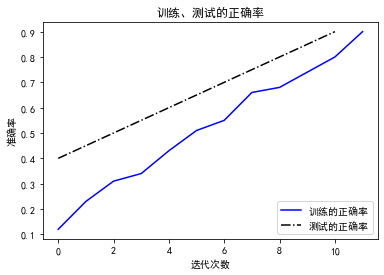

In [ ]:
#plot function
tra_accuracy=[0.12,0.23,0.31,0.34,0.43,0.51,0.55,0.66,0.68,0.74,0.8,0.9]
test_acc = [0.4,0.5,0.6,0.7,0.8,0.9]

a=np.linspace(0,100,2)
print(a)
#正确率绘图
fig1=plt.figure('fig1')
plt.plot(np.linspace(0, 11, len(tra_accuracy)),tra_accuracy,'b-',label='训练的正确率')
plt.plot(np.linspace(0, 10, len(test_acc)),test_acc,'k-.',label='测试的正确率')
plt.title('训练、测试的正确率')
plt.xlabel('迭代次数')
plt.ylabel('准确率')
plt.legend(loc='lower right')


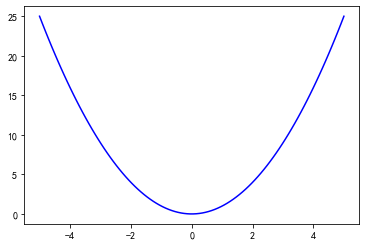

In [ ]:
#画出 y = x^2  在 -5,5
x = np.linspace(-5,5,100)
y =  np.square(x)
fig2 = plt.figure('fig2')
plt.plot(x,y,'b-',label='训练的正确率')
